> Igor Sorochan DSU-31

## Exploratory Data Analysis and Feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import sklearn.datasets as datasets

In [2]:
data = datasets.fetch_california_housing() 
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

#### Attribute Information:

* MedInc median income in block group

* HouseAge median house age in block group

* AveRooms average number of rooms per household

* AveBedrms average number of bedrooms per household

* Population block group population

* AveOccup average number of household members

* Latitude block group latitude

* Longitude block group longitude

## EDA
### Prepare

In [3]:
cols = data.feature_names
cols

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
target = data.target.reshape(-1,1)
target.shape

(20640, 1)

In [5]:
df = pd.DataFrame(data.data, columns=cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
df['target'] = target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Basic cleaning
#### Duplicates
No duplicates

In [7]:
df.duplicated().sum()

0

#### Nans
No nans

In [8]:
df.isna().sum().any()

False

In [9]:
# sns.pairplot(df)
# plt.show()

We can notice that the target variable is not normally distributed.  
We can apply a log transformation to make it more normally distributed.  
On all plots of target there is some anomaly which can be seen as an upper clipped area.

In [10]:
def lin_reg_model(X_train, X_test, y_train, y_test):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  r2 = lr.score(X_test, y_test)
  rmse = mean_squared_error(y_test, lr.predict(X_test), squared = False)

  return r2, rmse

Let's run LR model "from the box".

In [25]:
r2,rmse = lin_reg_model(*train_test_split(df.drop('target', axis=1), df.target, test_size=0.2, random_state=42))
results = {'From the box': [r2, rmse]}
print(f'R2 score "from the box": {r2:.4}')
print(f'RMSE "from the box": {rmse:.4}')

R2 score "from the box": 0.5758
RMSE "from the box": 0.7456


### Target values distribution

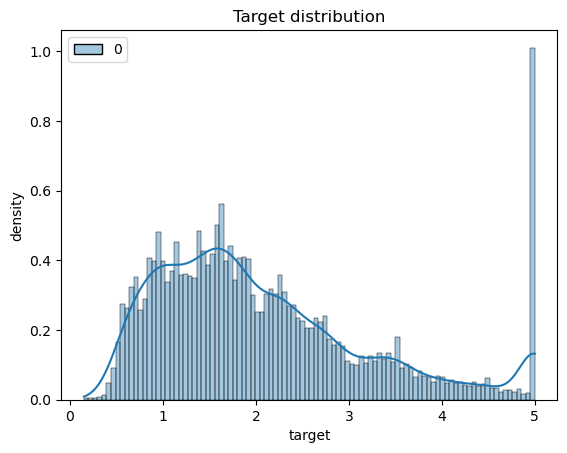

In [12]:
sns.histplot(target, kde=True, stat='density', bins=100, color='red', alpha=0.4)\
  .set(xlabel='target', ylabel='density', title='Target distribution')
plt.show()

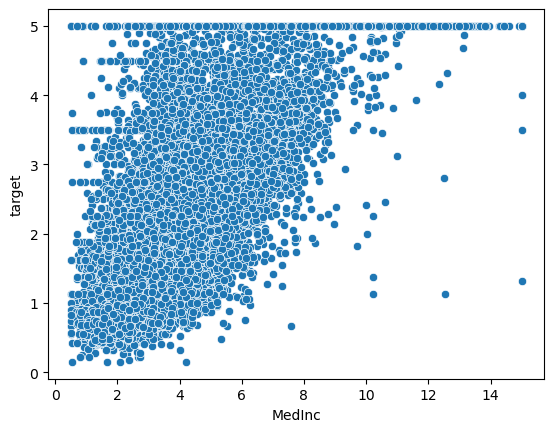

In [27]:
sns.scatterplot(data=df, x='MedInc', y='target')
plt.show()

Taking a log doesn't help:

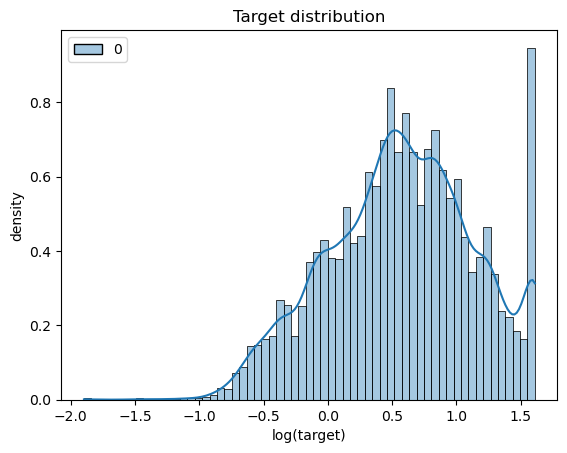

In [30]:
sns.histplot(np.log(target), kde=True, stat='density',  color='green', alpha=0.4)\
  .set(xlabel='log(target)', ylabel='density', title='Target distribution')
plt.show()

In [32]:
r2,rmse = lin_reg_model(*train_test_split(df.drop(['target'], axis=1), np.log(target), test_size=0.2, random_state=42) )
results['log(target)'] = [r2, rmse]
print(f'R2 score: {r2:.4}')
print(f'RMSE : {rmse:.4}')

R2 score: 0.5939
RMSE : 0.363


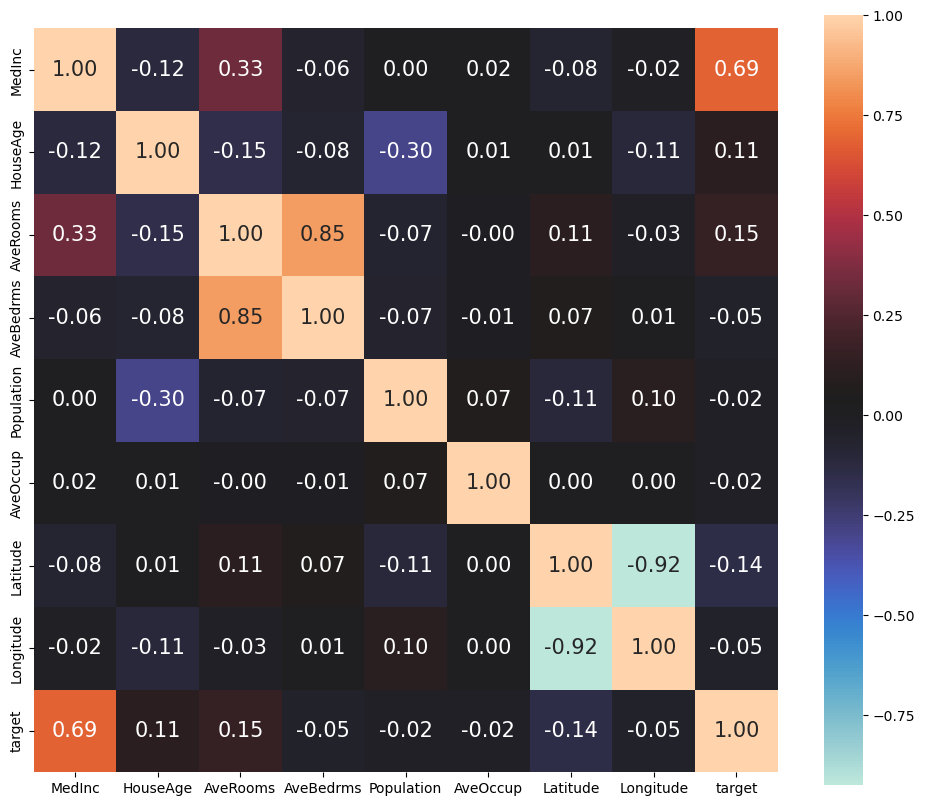

In [33]:
df_corr = df.corr(numeric_only= True)
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,10))
sns.heatmap(df_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='icefire')
plt.show()

Awesome!  
We have a lot of features with high correlation.  
Let's try to remove some of them.

In [34]:
r2,rmse = lin_reg_model(*train_test_split(df.drop(['AveBedrms','target'], axis=1), target, test_size=0.2, random_state=42))
results['Without AveBedrms'] = [r2, rmse]
print(f'R2 score: {r2:.4}')
print(f'RMSE : {rmse:.4}')

R2 score: 0.5823
RMSE : 0.7398


In [35]:
results

{'From the box': [0.5757877060324517, 0.7455813830127757],
 'log(target)': [0.5939443777226358, 0.36303139779408294],
 'Without AveBedrms': [0.5823239094526447, 0.7398151789804083]}

In [36]:
df2 = df[df.target <= 5] # removing outliers

The right peak escaped:

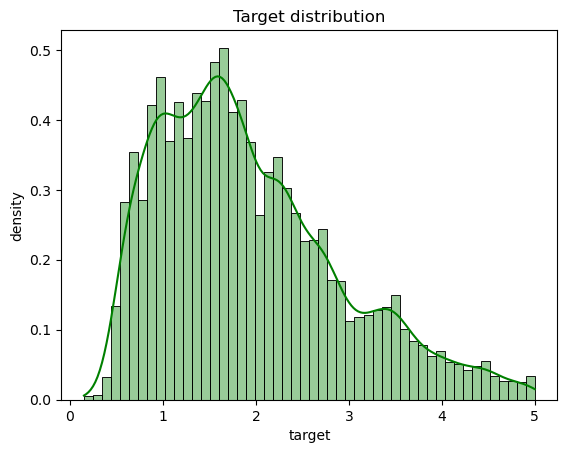

In [37]:
sns.histplot(df2.target, kde=True, stat='density',  color='green', alpha=0.4, 
             label='target').set(xlabel='target', ylabel='density', title='Target distribution')
plt.show()

In [38]:
r2,rmse = lin_reg_model(*train_test_split(df2.drop(['target'], axis=1), df2.target, test_size=0.2, random_state=42))
results['With clipped target'] = [r2, rmse]
print(f'R2 score: {r2:.4}')
print(f'RMSE : {rmse:.4}')

R2 score: 0.5749
RMSE : 0.6511


In [39]:
df3 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(df2.drop(['target'], axis=1))
r2,rmse = lin_reg_model(*train_test_split(df3, df2.target, test_size=0.2, random_state=42))
results['PolynomialFeatures'] = [r2, rmse]
print(f'R2 score: {r2:.4}')
print(f'RMSE : {rmse:.4}')

R2 score: 0.6435
RMSE : 0.5962


In [41]:
df3 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(df2.drop(['target'], axis=1))
r2,rmse = lin_reg_model(*train_test_split(df3, np.log(df2.target), test_size=0.2, random_state=42))
results['PolynomialFeatures, log(target)'] = [r2, rmse]
print(f'R2 score: {r2:.4}')
print(f'RMSE : {rmse:.4}')

R2 score: 0.6854
RMSE : 0.3028


In [42]:
pd.DataFrame(results, index=['R2 score', 'RMSE']).T.sort_values(by='R2 score', ascending=False).style.bar(subset=['R2 score'], color='lightgreen')

,R2 score,RMSE
"PolynomialFeatures, log(target)",0.685413,0.302755
PolynomialFeatures,0.643528,0.596186
log(target),0.593944,0.363031
Without AveBedrms,0.582324,0.739815
From the box,0.575788,0.745581
With clipped target,0.574870,0.651074
